# Lab 9b - 2-fold cross validation

We will finish Lab 9 in this notebook.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import datasets, linear_model
from sklearn.model_selection import KFold


%matplotlib inline

In [2]:
# Load the Anscombe quartet data
anscombe = sns.load_dataset("anscombe")
anscombe.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


In [3]:
# Separate out the Anscombe 3 data
anscombe_3 = anscombe[anscombe["dataset"] == "III"]
anscombe_3 = anscombe_3[["x","y"]]
anscombe_3

,x,y
22,10.0,7.46
23,8.0,6.77
24,13.0,12.74
25,9.0,7.11
26,11.0,7.81
27,14.0,8.84
28,6.0,6.08
29,4.0,5.39
30,12.0,8.15
31,7.0,6.42


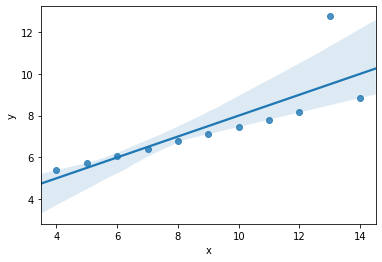

In [4]:
# Plot Anscombe 3
sns.regplot(x = "x", y = "y", data = anscombe_3)

In [5]:
# Split the data in half into fold 1 and fold 2
X_fold1, X_fold2, y_fold1, y_fold2 = train_test_split(anscombe_3[["x"]], anscombe_3["y"], test_size=0.5)

In [6]:
X_fold1

,x
27,14.0
29,4.0
23,8.0
28,6.0
32,5.0


Use the training data to fit the linear model using the sci-kit learn version:

In [7]:
lm = linear_model.LinearRegression()
model = lm.fit(X_fold1, y_fold1)

Use this linear model to make predictions for the fold 2 data:

In [8]:
predictions = model.predict(X_fold2)

Compute the mean squared error for the fold 2 predictions:

In [16]:
mse = ((y_fold2 - predictions)**2).mean()
mse

3.0032583533621744

Now let's do the reverse.  Use the fold2 data to create the linear model:

In [12]:
model2 = lm.fit(X_fold2, y_fold2)

Use this linear model to make predictions for the fold 1 data:

In [13]:
predictions2 = model2.predict(X_fold1)

Compute the mean squared error for the fold 1 predictions:

In [17]:
mse2 = ((y_fold1 - predictions2)**2).mean()
mse2

3.503330975510214

How do the two mean squared errors compare?  What might be happening here?

__The MSE for the model fitted to the second half of the dataset is larger than the MSE for the model fitted to the first half of the dataset. The first half of the dataset resembles a straight line much more than the second half of the dataset.__

To better understand whaat's happening, let's plot the two training data sets using `regplot()` in Seaborn.  

First plot the fold 1 data, where x is `X_fold1["x"]` and y is `y_fold1`.

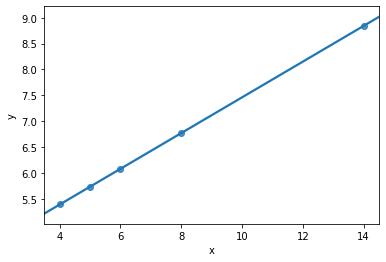

In [19]:
sns.regplot(x = X_fold1["x"], y = y_fold1, fit_reg = True)

Next plot the fold 2 data, where x is `X_fold2["x"]` and y is `y_fold2`.

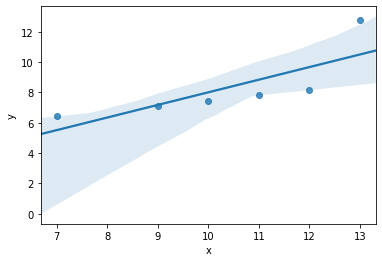

In [20]:
sns.regplot(x = X_fold2["x"], y = y_fold2, fit_reg = True)

C:\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Anaconda3\lib\site-packages\seaborn\regression.py:237: RankWarning: Polyfit may be poorly conditioned
  return np.polyval(np.polyfit(_x, _y, order), grid)
C:\Anaconda3\lib\site-packages\seaborn\regression.py

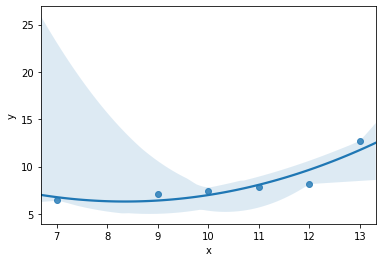

In [21]:
sns.regplot(x = X_fold2["x"], y = y_fold2, order= 2, fit_reg = True)